<a href="https://colab.research.google.com/github/nvaughnn/PyTorch-Tut/blob/main/Simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as functional
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
%matplotlib inline

In [28]:
# Cretate Model Class that inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 Features of Flower) -->
  # Hidden Layer 1 (with nerons) -->
  # Hidden Layer 2 --> Output
  def __init__(self, in_features=4, h1=8, h2=10, h3=16, out_features=3):
    super().__init__() # instantiate nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.out = nn.Linear(h3,out_features)

  def forwardpass(self, x):
    x = functional.relu(self.fc1(x))
    x = functional.relu(self.fc2(x))
    x = functional.relu(self.fc3(x))
    x = self.out(x)

    return x

In [29]:
# Random Seed
torch.manual_seed(41)
# Create Instance
model = Model()

In [31]:
# Load data file
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

# Change species to number
my_df['species'] = my_df['species'].replace('setosa', 0.0).replace('versicolor', 1.0).replace('virginica', 2.0)

<ipython-input-31-7a135fe33531>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('setosa', 0.0).replace('versicolor', 1.0).replace('virginica', 2.0)


In [32]:
# Train Test Split | Set x, y
XX = my_df.drop('species', axis=1)
yy = my_df['species']

In [33]:
# Convert to numpy arrays
X = XX.values
y = yy.values

In [34]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [35]:
# Convert X, y features to float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [36]:
# Meaure Error, Choose Optim, Learning Rate
crit = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr = 0.001)

Text(0.5, 0, 'Epoch')

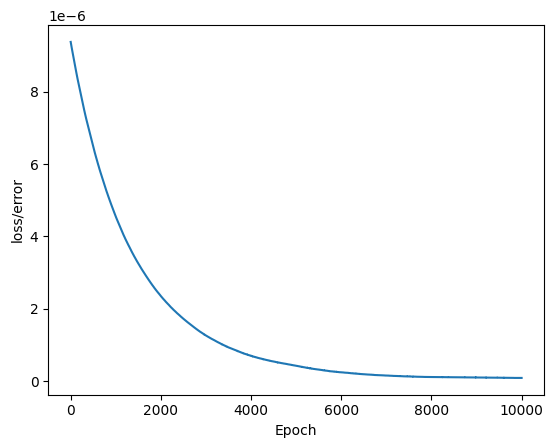

In [47]:
# Train, Need number of epochs or data runs through model
epochs = 10000
losses = []
for i in range(epochs):
  y_pred = model.forwardpass(X_train)

  # Measure Loss
  loss = crit(y_pred, y_train) # Predcited Vs Expected
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  #if i % 10 == 0:
    #print(f'Epoch: {i} and loss: {loss}')

  # Back Propagation
  opt.zero_grad()
  loss.backward()
  opt.step()

# MatPlot the epoch/error
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')